<a href="https://colab.research.google.com/github/joseojin/daegu-ai-school--/blob/main/Cognitive_2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision and Object Detection
Computer vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다. 네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [4]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [5]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

In [7]:
image_url = 'https://t1.daumcdn.net/cfile/blog/99DA16365CA6A1A431'

In [8]:
response = requests.get(image_url)

In [9]:
image = Image.open(BytesIO(response.content))

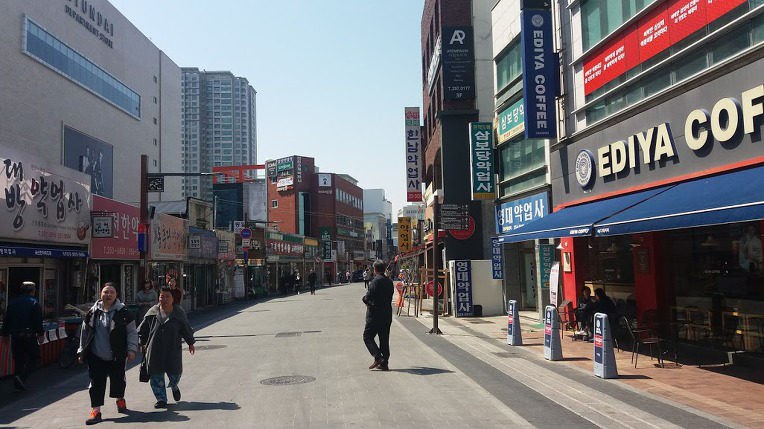

In [10]:
image

In [11]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [12]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [13]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [14]:
analysis

{'categories': [{'detail': {'landmarks': []},
   'name': 'outdoor_street',
   'score': 0.75390625}],
 'color': {'accentColor': 'AB2022',
  'dominantColorBackground': 'Grey',
  'dominantColorForeground': 'White',
  'dominantColors': ['Grey', 'Black', 'White'],
  'isBWImg': False,
  'isBwImg': False},
 'description': {'captions': [{'confidence': 0.9882235379553163,
    'text': 'a group of people walking on a city street'}],
  'tags': ['outdoor',
   'building',
   'road',
   'street',
   'city',
   'walking',
   'sidewalk',
   'people',
   'standing',
   'woman',
   'man',
   'bus',
   'store',
   'holding',
   'busy',
   'riding',
   'large',
   'tall',
   'group',
   'platform',
   'train',
   'parked',
   'sign']},
 'metadata': {'format': 'Jpeg', 'height': 429, 'width': 764},
 'requestId': 'f5d3721e-3a34-41b7-bdd0-8cb1f797077a'}

In [15]:
analysis['description']['captions'][0]['text']

'a group of people walking on a city street'

# Object Detection


In [23]:
objectDetection_url = vision_base_url + 'detect'

In [24]:
object_image = 'http://www.ymdaily.co.kr/data/photos/20200520/art_15894547299076_c3ffa1.jpg'

In [26]:
img = Image.open(BytesIO(requests.get(object_image).content))

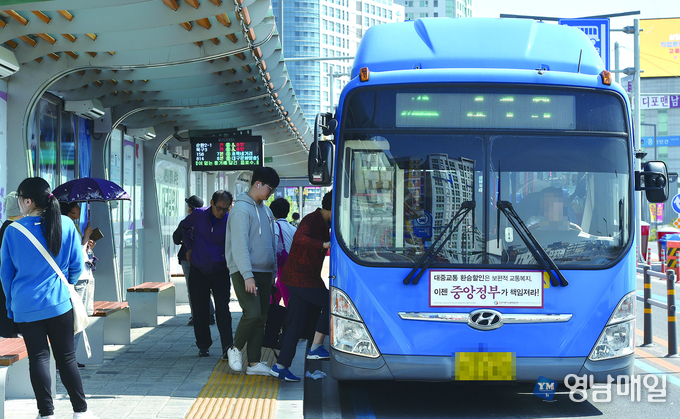

In [27]:
img

In [28]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
data = {'url' :object_image}

In [29]:
response = requests.post(objectDetection_url, headers = headers, json = data)

In [30]:
detectionResult = response.json()

In [31]:
detectionResult

{'metadata': {'format': 'Jpeg', 'height': 419, 'width': 680},
 'objects': [{'confidence': 0.741,
   'object': 'person',
   'rectangle': {'h': 218, 'w': 90, 'x': 6, 'y': 187}},
  {'confidence': 0.862,
   'object': 'person',
   'rectangle': {'h': 170, 'w': 53, 'x': 180, 'y': 188}},
  {'confidence': 0.813,
   'object': 'person',
   'rectangle': {'h': 210, 'w': 61, 'x': 230, 'y': 170}},
  {'confidence': 0.726,
   'object': 'person',
   'rectangle': {'h': 185, 'w': 61, 'x': 274, 'y': 197}},
  {'confidence': 0.819,
   'object': 'shuttle bus',
   'parent': {'confidence': 0.908,
    'object': 'bus',
    'parent': {'confidence': 0.945,
     'object': 'Land vehicle',
     'parent': {'confidence': 0.946, 'object': 'Vehicle'}}},
   'rectangle': {'h': 374, 'w': 348, 'x': 315, 'y': 26}}],
 'requestId': '7b34189b-3bf8-472c-9c1a-decb45258ebe'}

In [32]:
from PIL import Image, ImageDraw, ImageFont

In [33]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
    #print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    #사각형을 그리는 코드
    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    #글자를 입력하는 코드
    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

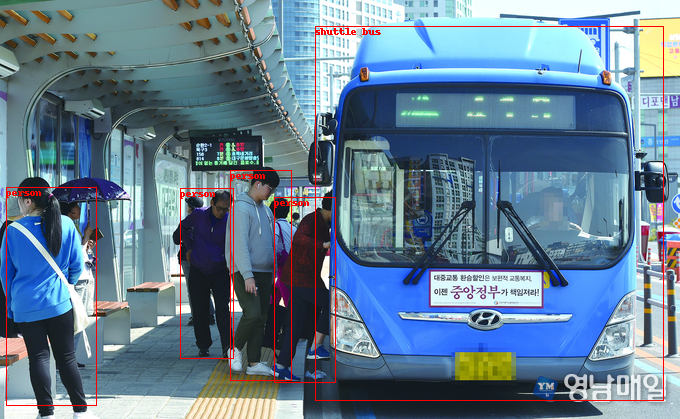

In [34]:
img